**ADDING THE HIDDEN LAYER TO THE AUTOENCODER AND VISUALIZING THE DATA**

In [1]:
from keras.layers import Input, Dense
from keras.models import Model
import matplotlib.pyplot as plt

In [2]:
# Define the size of encoded representations and the additional hidden layer size
encoding_dim = 32
hidden_dim = 64

In [3]:
# Input placeholder
input_img = Input(shape=(784,))

In [4]:
# First Encoding Layer
encoded1 = Dense(hidden_dim, activation='relu')(input_img)
# Second Encoding Layer
encoded2 = Dense(encoding_dim, activation='relu')(encoded1)

In [5]:
# First Decoding layer
decoded1 = Dense(hidden_dim, activation='relu')(encoded2)
# Second Decoding layer
decoded = Dense(784, activation='relu')(decoded1)

In [6]:
# Creating the autoencoder model
autoencoder = Model(input_img, decoded)

In [7]:
# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [8]:
# Loading and preprocessing the data
from keras.datasets import fashion_mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

4422102/4422102 [==============================] - 0s 0us/step


In [9]:
# Train the autoencoder
history = autoencoder.fit(x_train, x_train, epochs=25, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/25
235/235 [==============================] - 14s 37ms/step - loss: 0.7129 - val_loss: 0.5402
Epoch 2/25
235/235 [==============================] - 3s 12ms/step - loss: 0.5172 - val_loss: 0.5057
Epoch 3/25
235/235 [==============================] - 3s 13ms/step - loss: 0.4897 - val_loss: 0.4781
Epoch 4/25
235/235 [==============================] - 3s 13ms/step - loss: 0.4792 - val_loss: 0.4846
Epoch 5/25
235/235 [==============================] - 4s 16ms/step - loss: 0.4688 - val_loss: 0.4677
Epoch 6/25
235/235 [==============================] - 3s 11ms/step - loss: 0.4508 - val_loss: 0.4499
Epoch 7/25
235/235 [==============================] - 3s 12ms/step - loss: 0.4379 - val_loss: 0.4354
Epoch 8/25
235/235 [==============================] - 3s 12ms/step - loss: 0.4451 - val_loss: 0.4351
Epoch 9/25
235/235 [==============================] - 4s 17ms/step - loss: 0.4355 - val_loss: 0.4301
Epoch 10/25
235/235 [==============================] - 3s 12ms/step - loss: 0.4265 - val_l

In [10]:
# Predict and visualize one of the reconstructed test data
decoded_imgs = autoencoder.predict(x_test)

313/313 [==============================] - 1s 3ms/step


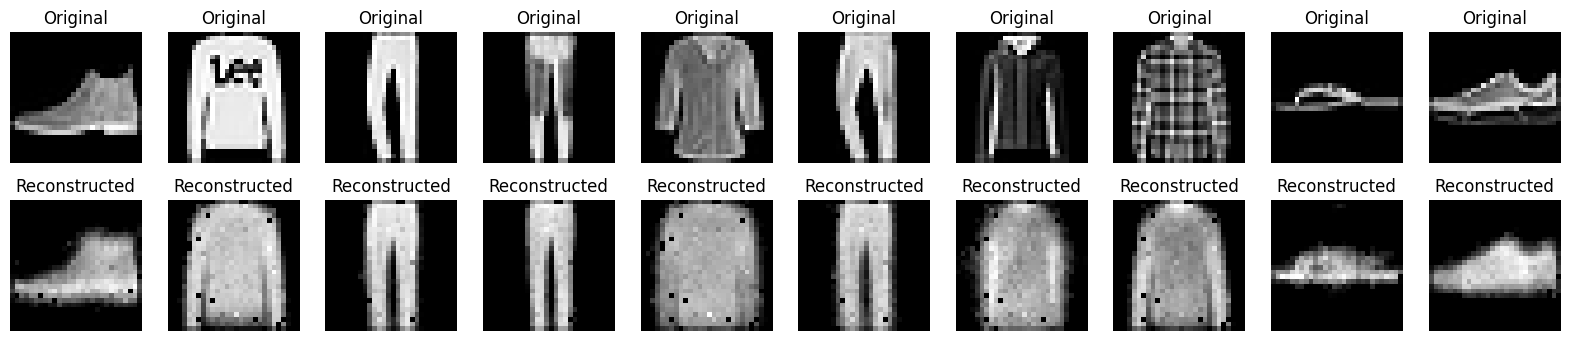

In [11]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28),cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28),cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.show()

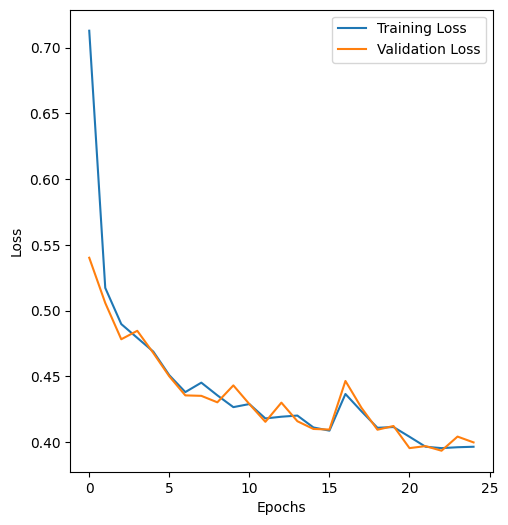

In [12]:
# Visualize the loss and accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

**ADDING HIDDEN LAYER TO THE DENOISENING AUTOENCODER AND VISUALIZING THE DATA**

In [13]:
from keras.layers import Input, Dense
from keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

In [14]:
encoding_dim = 32
hidden_dim = 64

In [15]:
# Input placeholder for noisy data
input_img = Input(shape=(784,))

In [16]:
# First Encoding Layer
encoded1 = Dense(hidden_dim, activation='relu')(input_img)

# Second Encoding Layer
encoded2 = Dense(encoding_dim, activation='relu')(encoded1)

In [17]:
# First Decoding layer
decoded1 = Dense(hidden_dim, activation='relu')(encoded2)

# Second Decoding layer
decoded2 = Dense(784, activation='sigmoid')(decoded1)


In [18]:
# Creating the denoising autoencoder model
autoencoder = Model(input_img, decoded2)

In [19]:
# Compiling the denoising autoencoder model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [20]:
# Loading and Preprocessing the data
from keras.datasets import fashion_mnist

(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [21]:
# Introducing Noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

In [22]:
# Train the Denoising Autoencoder
history = autoencoder.fit(x_train_noisy, x_train, epochs=20, batch_size=256, shuffle=True, validation_data=(x_test_noisy, x_test_noisy))

Epoch 1/20
235/235 [==============================] - 5s 15ms/step - loss: 0.3923 - val_loss: 0.3203
Epoch 2/20
235/235 [==============================] - 6s 24ms/step - loss: 0.3226 - val_loss: 0.3026
Epoch 3/20
235/235 [==============================] - 6s 28ms/step - loss: 0.3137 - val_loss: 0.2925
Epoch 4/20
235/235 [==============================] - 6s 27ms/step - loss: 0.3090 - val_loss: 0.2868
Epoch 5/20
235/235 [==============================] - 7s 28ms/step - loss: 0.3062 - val_loss: 0.2825
Epoch 6/20
235/235 [==============================] - 5s 23ms/step - loss: 0.3039 - val_loss: 0.2792
Epoch 7/20
235/235 [==============================] - 3s 15ms/step - loss: 0.3022 - val_loss: 0.2766
Epoch 8/20
235/235 [==============================] - 3s 12ms/step - loss: 0.3009 - val_loss: 0.2743
Epoch 9/20
235/235 [==============================] - 3s 14ms/step - loss: 0.2998 - val_loss: 0.2725
Epoch 10/20
235/235 [==============================] - 4s 16ms/step - loss: 0.2990 - val_lo

In [23]:
# Predict and visualize one of the reconstructed test data
decoded_imgs = autoencoder.predict(x_test_noisy)

313/313 [==============================] - 1s 2ms/step


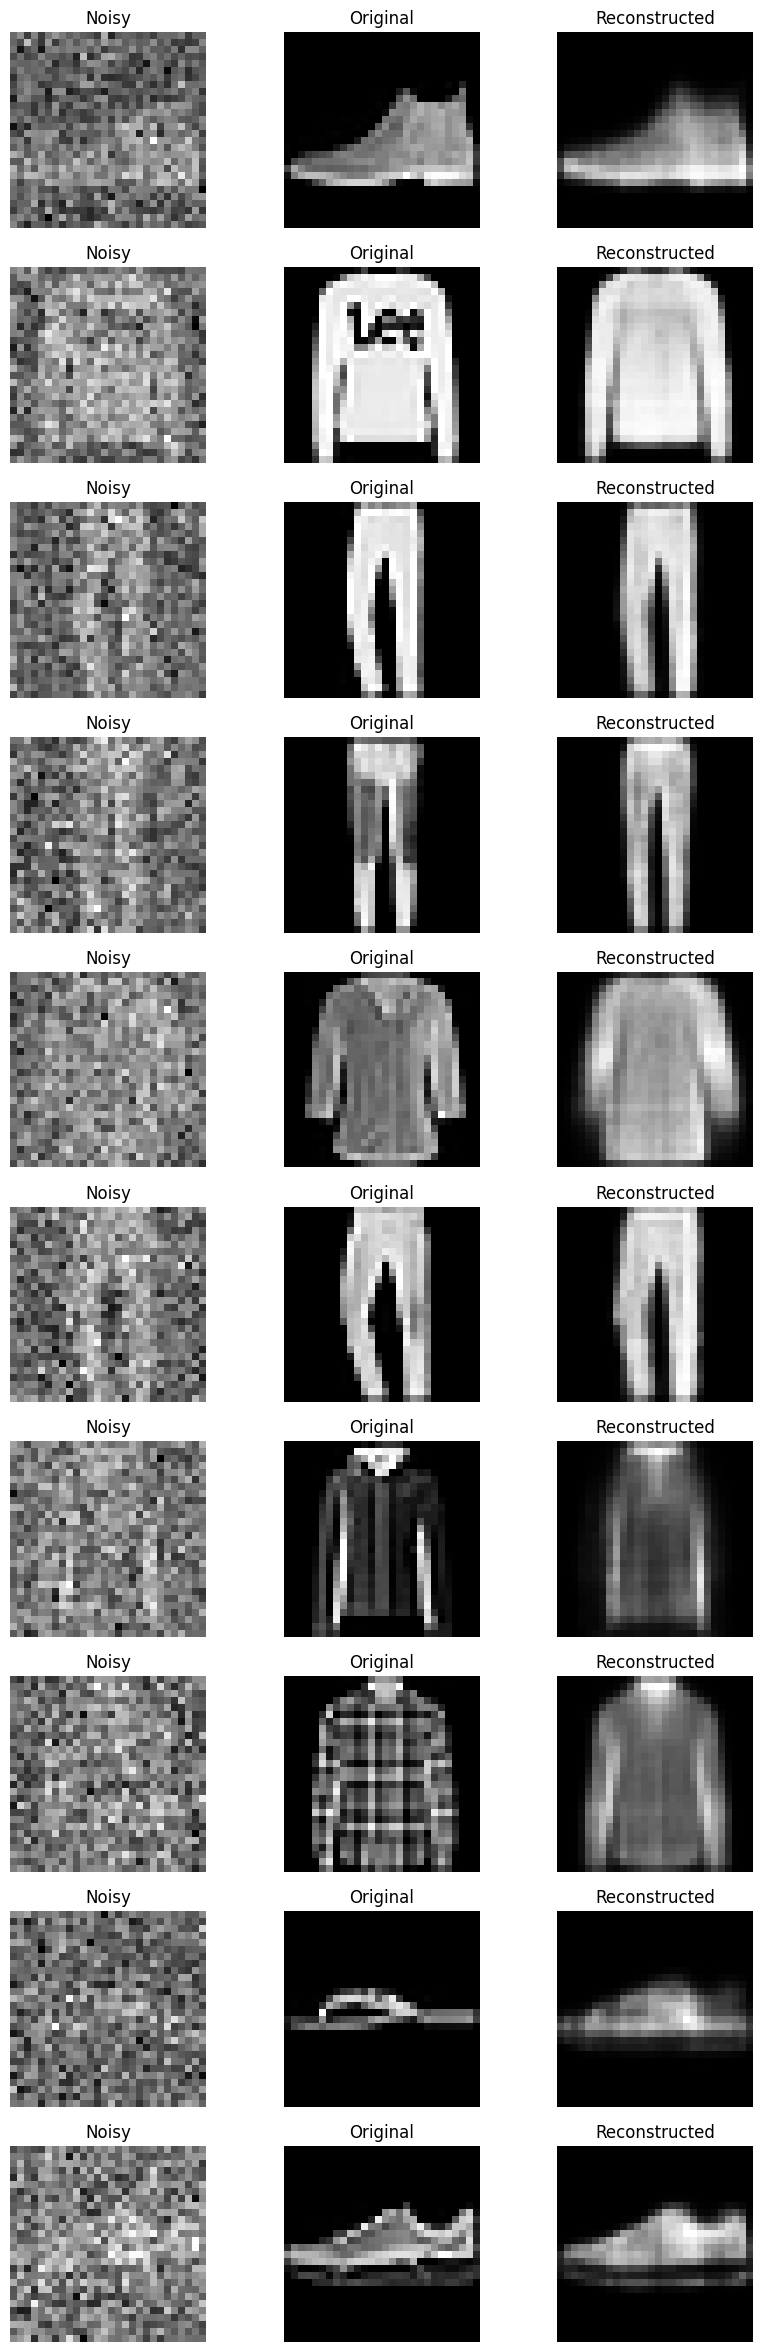

In [24]:
n = 10
plt.figure(figsize=(10, 30))
for i in range(n):
    # Display Noisy Images
    ax = plt.subplot(n, 3,i*3 + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28),cmap='gray')
    plt.title("Noisy")
    plt.axis('off')

    # Display Original Images
    ax = plt.subplot(n, 3, i*3 + 2)
    plt.imshow(x_test[i].reshape(28, 28),cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Display Reconstructed Images
    ax = plt.subplot(n,3, i*3 + 3)
    plt.imshow(decoded_imgs[i].reshape(28, 28),cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

In [25]:
plt.show()

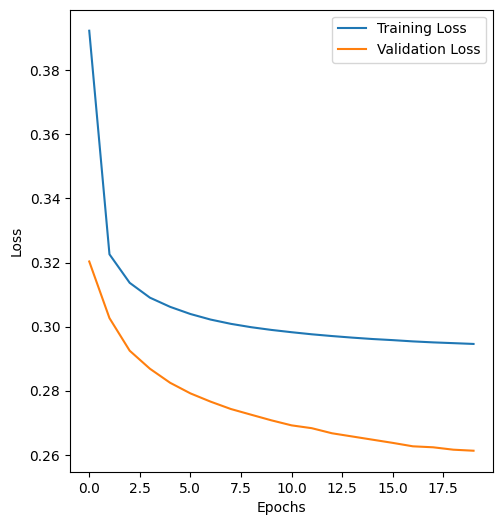

In [26]:
# Visualize the loss and accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()